## Model Training

In [39]:
#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
!pip install catboost
!pip install xgboost

# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records
df.head()

#### Preparing X and Y variables
# Strip spaces and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove leading/trailing spaces and standardize capitalization
df['loan_status'] = df['loan_status'].str.strip().str.title()       # 'Approved' / 'Rejected'
df['self_employed'] = df['self_employed'].str.strip().str.title()   # 'Yes' / 'No'
df['education'] = df['education'].str.strip().str.title()        # 'Graduate' / 'Not Graduate'

# Check counts
print("Loan Status value counts:")
print(df['loan_status'].value_counts())
print("\nSelf Employed value counts:")
print(df['self_employed'].value_counts())
print("\nEducation value counts:")
print(df['education'].value_counts())

# Create total assets and credit category features
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']
df['credit_category'] = pd.cut(df['cibil_score'], bins=[0, 500, 600, 700, 850], 
                               labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Drop unnecessary columns and prepare X, y
X = df.drop(columns=['loan_id', 'loan_status', 'credit_category', 'total_assets'], axis=1)
y = df['loan_status']

# Convert target to binary
y = y.map({'Approved': 1, 'Rejected': 0})

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nCategories in 'education' variable:", df['education'].unique())
print("Categories in 'self_employed' variable:", df['self_employed'].unique())
print("Categories in 'loan_status' variable:", df['loan_status'].unique())
print("Categories in 'credit_category' variable:", df['credit_category'].unique())

# Define numerical and categorical features
num_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
cat_features = ['education', 'self_employed']

print("\nNumerical features:", num_features)
print("Categorical features:", cat_features)

# Preprocessing
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features),
])

X = preprocessor.fit_transform(X)
print("Shape after preprocessing:", X.shape)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#### Create an Evaluate Function to give all metrics after model Training
def evaluate_model(y_true, y_pred):
    """
    Evaluate classification model performance
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

# Classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}
# Train and evaluate models
model_results = {}
model_list = []  # Initialize model_list

for name, model in models.items():
    print(f"\nTraining {name}...")
    model_list.append(name)  # Add model name to the list
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model
    results = evaluate_model(y_test, y_pred)
    model_results[name] = results
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1 Score: {results['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{results['confusion_matrix']}")

# Compare model performance
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

for name, results in model_results.items():
    print(f"{name}: Accuracy = {results['accuracy']:.4f}, F1 = {results['f1_score']:.4f}")

# NOW create the comparison DataFrames (after model training is complete)
print("\n" + "="*50)
print("COMPARISON DATAFRAMES")
print("="*50)

# Create a DataFrame with model names and accuracy scores
accuracy_list = [model_results[name]['accuracy'] for name in model_list]
results_df = pd.DataFrame(list(zip(model_list, accuracy_list)), 
                         columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"], ascending=False)

print("Models sorted by Accuracy:")
print(results_df)
print()


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\yadav\OneDrive\Desktop\ML_Project\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\yadav\OneDrive\Desktop\ML_Project\venv\Scripts\python.exe -m pip install --upgrade pip


Loan Status value counts:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Self Employed value counts:
self_employed
Yes    2150
No     2119
Name: count, dtype: int64

Education value counts:
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
Shape of X: (4269, 11)
Shape of y: (4269,)

Categories in 'education' variable: ['Graduate' 'Not Graduate']
Categories in 'self_employed' variable: ['No' 'Yes']
Categories in 'loan_status' variable: ['Approved' 'Rejected']
Categories in 'credit_category' variable: ['Excellent', 'Poor', 'Fair', 'Good', NaN]
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

Numerical features: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical features: ['education', 'self_employed']
Shape after preprocessing: (4269, 13)
X_train shape: (3415, 13)
X_test shape: (85

### Results

In [40]:
# Create a comprehensive comparison DataFrame
comparison_data = []
for name in model_list:
    comparison_data.append({
        'Model Name': name,
        'Accuracy': model_results[name]['accuracy'],
        'Precision': model_results[name]['precision'],
        'Recall': model_results[name]['recall'],
        'F1_Score': model_results[name]['f1_score']
    })

results_df = pd.DataFrame(comparison_data).sort_values(by=["F1_Score"], ascending=False)
print("Models sorted by F1 Score:")
print(results_df)

Models sorted by F1 Score:
                 Model Name  Accuracy  Precision    Recall  F1_Score
4             XGBClassifier  0.982436   0.983302  0.988806  0.986047
3  Random Forest Classifier  0.978923   0.979630  0.986940  0.983271
5       CatBoost Classifier  0.976581   0.979554  0.983209  0.981378
2  Decision Tree Classifier  0.975410   0.974217  0.986940  0.980538
6       AdaBoost Classifier  0.969555   0.975746  0.975746  0.975746
0       Logistic Regression  0.903981   0.918819  0.929104  0.923933
1    K-Neighbors Classifier  0.895785   0.928983  0.902985  0.915799


## XG Boost Classifier

In [41]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f" Accuracy of the model is {accuracy:.2f}%")

# For classification, we can't use scatter plot in the same way as regression
# Instead, let's create a comparison of actual vs predicted

# Create a DataFrame to compare actual and predicted values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred_df['Match'] = pred_df['Actual Value'] == pred_df['Predicted Value']

print("\nFirst 20 predictions comparison:")
print(pred_df.head(20))

 Accuracy of the model is 98.24%

First 20 predictions comparison:
      Actual Value  Predicted Value  Match
1703             0                0   True
1173             1                1   True
308              0                0   True
1322             1                1   True
3271             1                1   True
3539             1                1   True
1522             1                1   True
3399             0                0   True
1402             1                1   True
1829             0                0   True
296              0                0   True
2700             1                1   True
471              1                1   True
3055             0                0   True
1123             0                0   True
2357             1                1   True
4242             1                1   True
3839             1                1   True
1130             1                1   True
3642             0                0   True


Text(0.5, 14.722222222222216, 'Predicted')

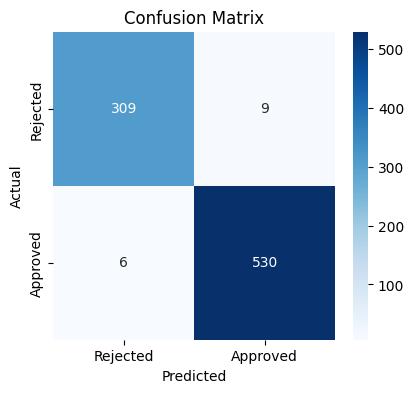

In [42]:
# Plot confusion matrix instead of scatter plot
plt.figure(figsize=(10, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')


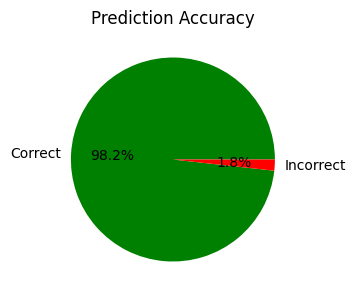

In [43]:
# Subplot 2: Actual vs Predicted comparison
plt.subplot(1, 2, 2)
match_counts = pred_df['Match'].value_counts()
plt.pie(match_counts.values, labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Prediction Accuracy')

plt.tight_layout()
plt.show()

In [44]:
# Detailed performance metrics
print("\n" + "="*50)
print("DETAILED PERFORMANCE METRICS")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

# Show the comparison DataFrame
print("\n" + "="*50)
print("PREDICTION COMPARISON (First 30 rows)")
print("="*50)
print(pred_df.head(30))


DETAILED PERFORMANCE METRICS
              precision    recall  f1-score   support

    Rejected       0.98      0.97      0.98       318
    Approved       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


PREDICTION COMPARISON (First 30 rows)
      Actual Value  Predicted Value  Match
1703             0                0   True
1173             1                1   True
308              0                0   True
1322             1                1   True
3271             1                1   True
3539             1                1   True
1522             1                1   True
3399             0                0   True
1402             1                1   True
1829             0                0   True
296              0                0   True
2700             1                1   True
471              1                1   True
30

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f" Accuracy of the model is {accuracy:.2f}%")

# For classification, we can't use scatter plot in the same way as regression
# Instead, let's create a comparison of actual vs predicted

# Create a DataFrame to compare actual and predicted values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred_df['Match'] = pred_df['Actual Value'] == pred_df['Predicted Value']

print("\nFirst 20 predictions comparison:")
print(pred_df.head(20))

 Accuracy of the model is 98.24%

First 20 predictions comparison:
      Actual Value  Predicted Value  Match
1703             0                0   True
1173             1                1   True
308              0                0   True
1322             1                1   True
3271             1                1   True
3539             1                1   True
1522             1                1   True
3399             0                0   True
1402             1                1   True
1829             0                0   True
296              0                0   True
2700             1                1   True
471              1                1   True
3055             0                0   True
1123             0                0   True
2357             1                1   True
4242             1                1   True
3839             1                1   True
1130             1                1   True
3642             0                0   True


## Plot y_pred and y_test

Text(0.5, 14.722222222222216, 'Predicted')

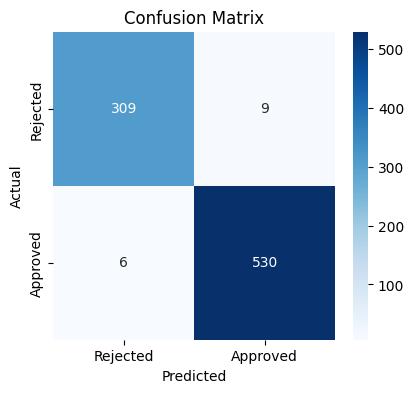

In [ ]:
# Plot confusion matrix instead of scatter plot
plt.figure(figsize=(10, 4))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')


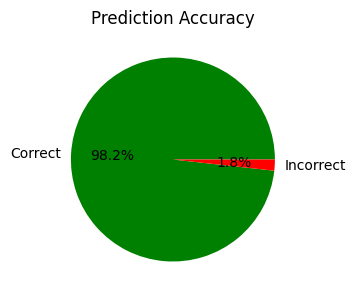

In [ ]:
# Subplot 2: Actual vs Predicted comparison
plt.subplot(1, 2, 2)
match_counts = pred_df['Match'].value_counts()
plt.pie(match_counts.values, labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Prediction Accuracy')

plt.tight_layout()
plt.show()

In [45]:
# Detailed performance metrics
print("\n" + "="*50)
print("DETAILED PERFORMANCE METRICS")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

# Show the comparison DataFrame
print("\n" + "="*50)
print("PREDICTION COMPARISON (First 30 rows)")
print("="*50)
print(pred_df.head(30))


DETAILED PERFORMANCE METRICS
              precision    recall  f1-score   support

    Rejected       0.98      0.97      0.98       318
    Approved       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


PREDICTION COMPARISON (First 30 rows)
      Actual Value  Predicted Value  Match
1703             0                0   True
1173             1                1   True
308              0                0   True
1322             1                1   True
3271             1                1   True
3539             1                1   True
1522             1                1   True
3399             0                0   True
1402             1                1   True
1829             0                0   True
296              0                0   True
2700             1                1   True
471              1                1   True
30